## Importing Libraries

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pre-requisite

In [9]:
circles_img = cv2.imread('circles.jpg')

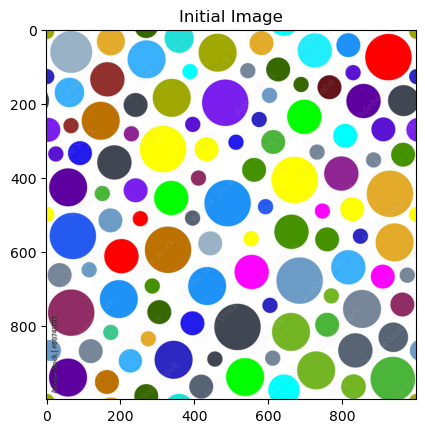

In [10]:
plt.imshow(circles_img)
plt.title('Initial Image')
plt.show()

In [11]:
gray = cv2.cvtColor(circles_img, cv2.COLOR_BGR2GRAY)

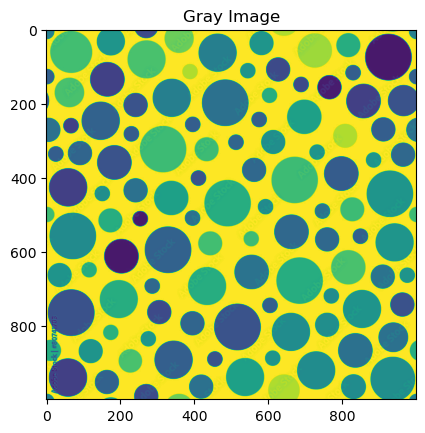

In [12]:
plt.imshow(gray)
plt.title('Gray Image')
plt.show()

In [13]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

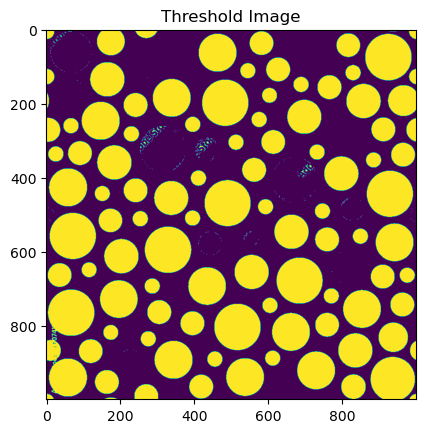

In [14]:
plt.imshow(thresh)
plt.title('Threshold Image')
plt.show()